In [158]:
import numpy as np
import matplotlib.pyplot as plt
% load_ext autoreload
# To reload local imported modules dynamically
% autoreload 2
plt.rcParams["figure.figsize"] = (20, 10)

UsageError: Line magic function `%` not found.


## Градиентный спуск с фиксированным шагом

In [ ]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

In [ ]:
lr = 0.06
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Экспоненциальный шаг градиентного спуска

In [ ]:
import optimization as opt

epoch = 20
x = [-20, -20]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Поиск минимума одномерной функции при помощи дихотомии

In [ ]:
import optimization as opt


def f(x):
    return 3 * (x[0] - 1) ** 2 + 5


x = [-100]

bounds = opt.find_unimodal_interval(f, x)
points = opt.dichotomy(f, bounds, lambda iter, point: iter >= 20, log=True)

print(points)
t = np.linspace(-30, 30, 1000)
plt.plot(t, f([t]))
plt.plot(points, f([points]), 'o-')

## Градиентный спуск на основе дихотомии

In [ ]:
import optimization as opt


def f(x):
    return np.sin(0.5 * x[0] ** 2 - 0.25 * x[1] ** 2 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))


epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x)),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 0.5, max(*points[:, 0], *points[:, 1]) + 0.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted(list(set([f(p) for p in points]))))

## Поиск минимума одномерной функции с помощью условий Вольфе

In [ ]:
import optimization as opt


def f(x):
    return (x[0] - 5) ** 2 + 3


epoch = 10
x = [-5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x,
                                                                                                 -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
t = [np.linspace(-30, 30, 1000)]
plt.plot(t[0], f(t))
plt.plot(points, f([points]), 'o-')

## Поиск минимума двумерной функции с помощью условий Вольфе

In [ ]:
import optimization as opt


def f(x):
    return np.sin(0.5 * x[0] ** 2 - 0.25 * x[1] ** 2 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))


epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x,
                                                                                                 -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
t = np.linspace(-1.5, 2.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")

## Поиск минимума функции многих переменных с помощью условий Вольфе

In [ ]:
import optimization as opt


def f(x):
    return 5 * (x[0] - 2) ** 2 + 3 * (x[1] + 2) ** 2 + 4 * (x[2] - 6) ** 2 + 1


epoch = 20
x = [-5, 5, 1]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x,
                                                                                                 -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(f(points))

## Генерация случайной квадратичной функции от 2 переменных

In [ ]:
import optimization as opt

f = opt.gen_quadratic_function(2, 10)

epoch = 10
x = [2, -3]

points = opt.gradient_descent(
    x,
    lambda x: x - 0.02 * opt.grad(f, x),
    lambda iteration, p: iteration >= epoch
)

print(points)
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 5, max(*points[:, 0], *points[:, 1]) + 5, 1000)
X = np.meshgrid(t, t)
ax1 = plt.figure().add_subplot(projection='3d')
ax1.plot_surface(X[0], X[1], f(X))
ax1.scatter(points[0][0], points[0][1], f(points[0]), color='red', linewidths=5)
ax2 = plt.figure().add_subplot()
ax2.plot(points[:, 0], points[:, 1], 'o-', color="red")
ax2.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))

Пункт 5

Выбор начальной точки
Чем ближе к экстремуму выберем начальную точку, тем точнее сможем найти его

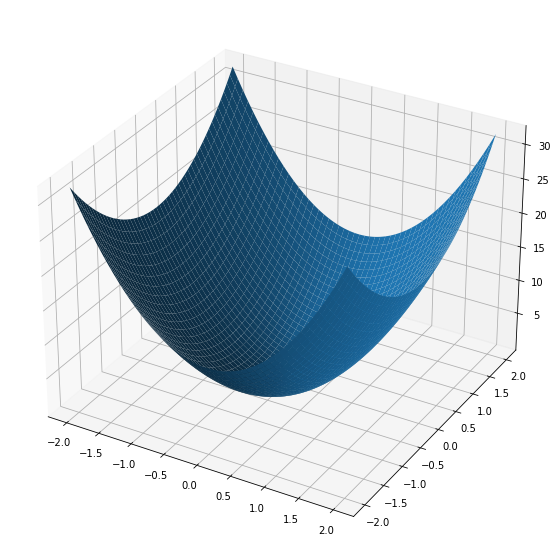

In [159]:
def f(x, y):
    return 5 * x ** 2 + 3 * y ** 2


def grad(x, y):
    return [10 * x, 6 * y]

t = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[1.         1.        ]
 [0.9        0.94      ]
 [0.81       0.8836    ]
 [0.729      0.830584  ]
 [0.6561     0.78074896]
 [0.59049    0.73390402]
 [0.531441   0.68986978]
 [0.4782969  0.64847759]
 [0.43046721 0.60956894]
 [0.38742049 0.5729948 ]
 [0.34867844 0.53861511]
 [0.3138106  0.50629821]
 [0.28242954 0.47592031]
 [0.25418658 0.4473651 ]
 [0.22876792 0.42052319]
 [0.20589113 0.3952918 ]
 [0.18530202 0.37157429]
 [0.16677182 0.34927983]
 [0.15009464 0.32832304]
 [0.13508517 0.30862366]]


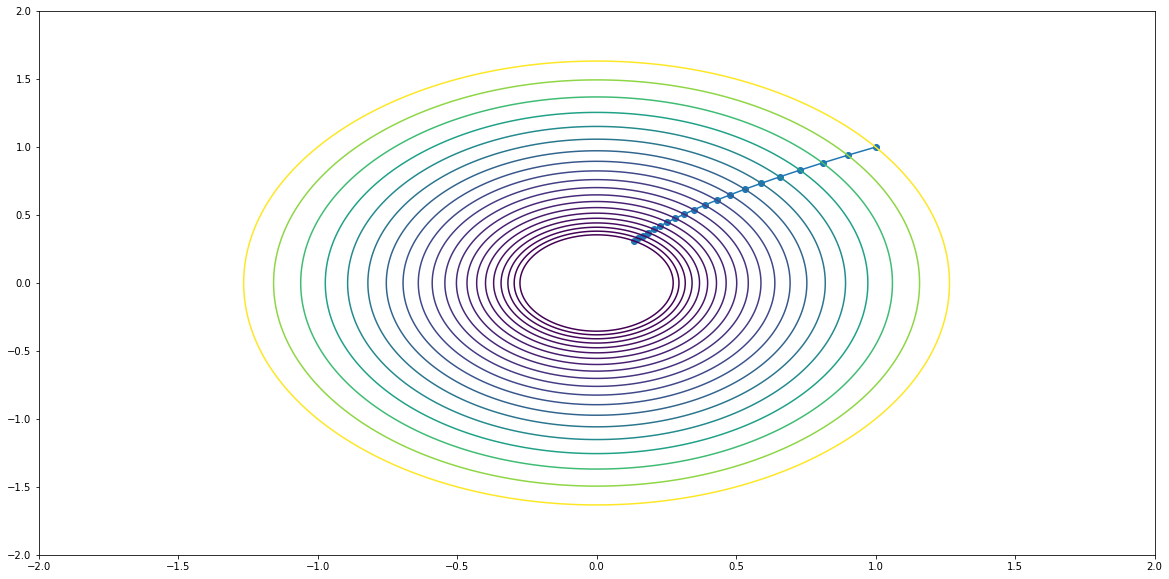

In [160]:
lr = 0.01
epoch = 20
x = [1, 1]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

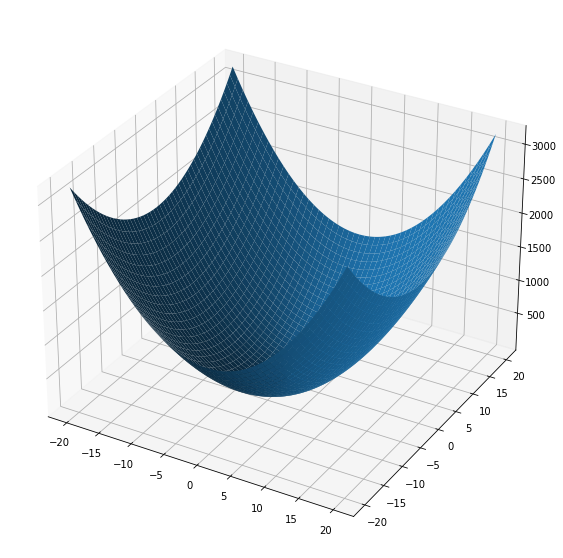

In [161]:
def f(x, y):
    return 5 * x ** 2 + 3 * y ** 2


def grad(x, y):
    return [10 * x, 6 * y]


t = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-20.         -20.        ]
 [-18.         -18.8       ]
 [-16.2        -17.672     ]
 [-14.58       -16.61168   ]
 [-13.122      -15.6149792 ]
 [-11.8098     -14.67808045]
 [-10.62882    -13.79739562]
 [ -9.565938   -12.96955188]
 [ -8.6093442  -12.19137877]
 [ -7.74840978 -11.45989604]
 [ -6.9735688  -10.77230228]
 [ -6.27621192 -10.12596414]
 [ -5.64859073  -9.5184063 ]
 [ -5.08373166  -8.94730192]
 [ -4.57535849  -8.4104638 ]
 [ -4.11782264  -7.90583598]
 [ -3.70604038  -7.43148582]
 [ -3.33543634  -6.98559667]
 [ -3.00189271  -6.56646087]
 [ -2.70170344  -6.17247322]]


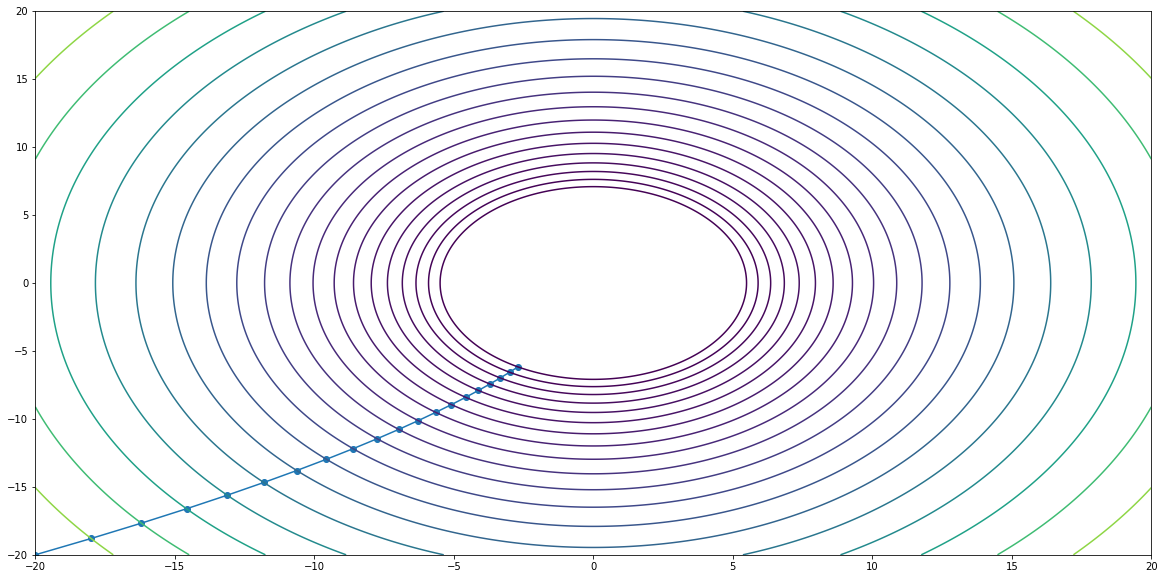

In [162]:
lr = 0.01
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

Постоянный шаг не нашел минимум, а разошелся

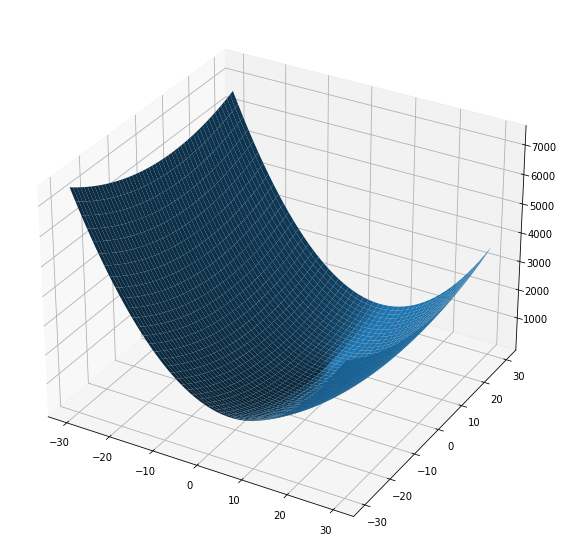

In [163]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-20.         -20.        ]
 [ 30.          -9.2       ]
 [-20.          -2.72      ]
 [ 30.           1.168     ]
 [-20.           3.5008    ]
 [ 30.           4.90048   ]
 [-20.           5.740288  ]
 [ 30.           6.2441728 ]
 [-20.           6.54650368]
 [ 30.           6.72790221]
 [-20.           6.83674132]
 [ 30.           6.90204479]
 [-20.           6.94122688]
 [ 30.           6.96473613]
 [-20.           6.97884168]
 [ 30.           6.98730501]
 [-20.           6.992383  ]
 [ 30.           6.9954298 ]
 [-20.           6.99725788]
 [ 30.           6.99835473]]


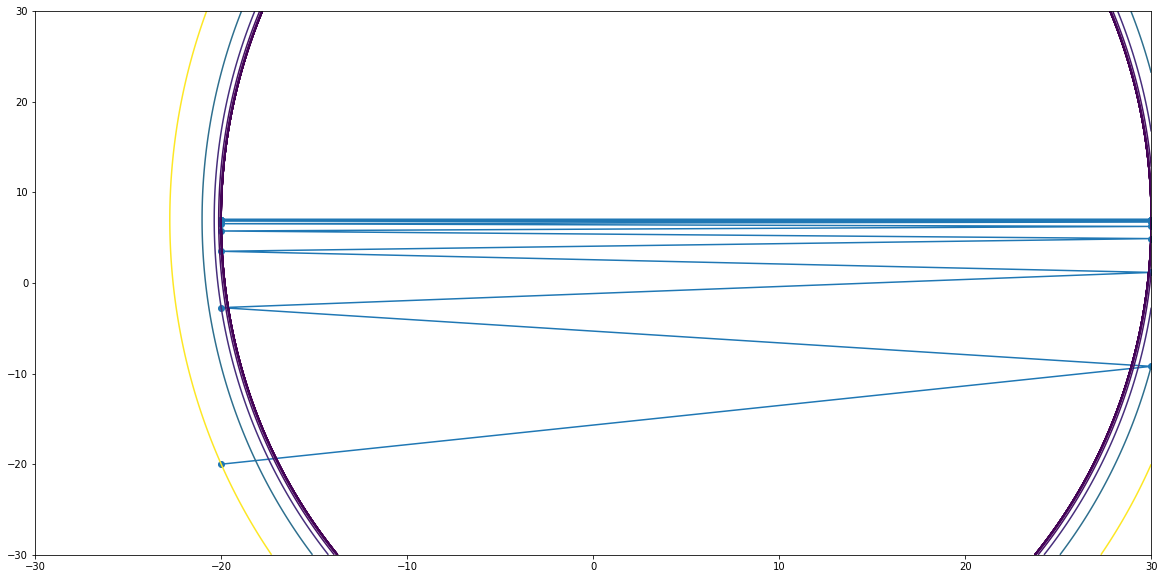

In [164]:
lr = 0.2
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

[[-20.         -20.        ]
 [  5.         -14.6       ]
 [  5.         -10.32298472]
 [  5.          -6.92699139]
 [  5.          -4.22391407]
 [  5.          -2.06715045]
 [  5.          -0.34216239]
 [  5.           1.04075524]
 [  5.           2.15202784]
 [  5.           3.04707631]
 [  5.           3.76961635]
 [  5.           4.35421075]
 [  5.           4.82824842]
 [  5.           5.21348259]
 [  5.           5.52722914]
 [  5.           5.78330224]
 [  5.           5.99274653]
 [  5.           6.16441149]
 [  5.           6.30540282]
 [  5.           6.42143808]]


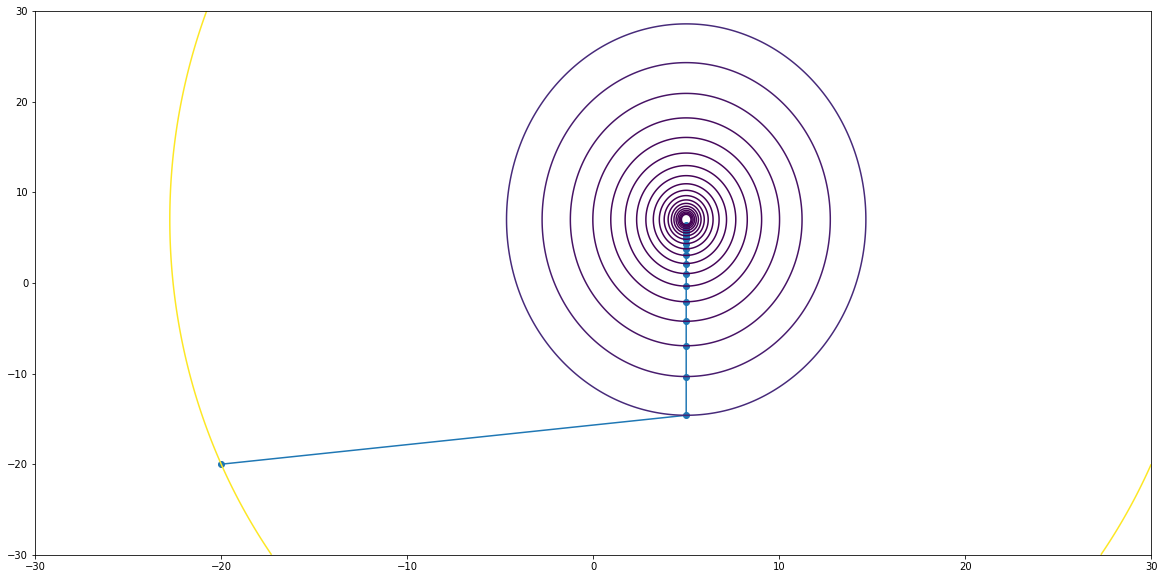

In [165]:
import optimization as opt

epoch = 20
x = [-20, -20]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

Экспоненциальный шаг нашел хуже (при постоянном изменении найденное значение меньше)

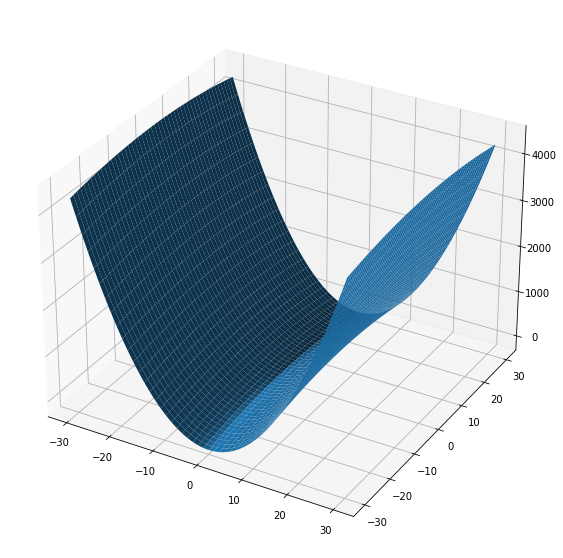

In [166]:
def f(x, y):
    return 5 * x ** 2 - 0.25 * y ** 2


def grad(x, y):
    return [10 * x, - 0.5 * y]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-1.00000000e+01 -1.00000000e+01]
 [-2.00000000e+00 -1.04000000e+01]
 [-4.00000000e-01 -1.08160000e+01]
 [-8.00000000e-02 -1.12486400e+01]
 [-1.60000000e-02 -1.16985856e+01]
 [-3.20000000e-03 -1.21665290e+01]
 [-6.40000000e-04 -1.26531902e+01]
 [-1.28000000e-04 -1.31593178e+01]
 [-2.56000000e-05 -1.36856905e+01]
 [-5.12000000e-06 -1.42331181e+01]
 [-1.02400000e-06 -1.48024428e+01]
 [-2.04800000e-07 -1.53945406e+01]
 [-4.09600000e-08 -1.60103222e+01]
 [-8.19200000e-09 -1.66507351e+01]
 [-1.63840000e-09 -1.73167645e+01]
 [-3.27680000e-10 -1.80094351e+01]
 [-6.55360000e-11 -1.87298125e+01]
 [-1.31072000e-11 -1.94790050e+01]
 [-2.62144000e-12 -2.02581652e+01]
 [-5.24288000e-13 -2.10684918e+01]]


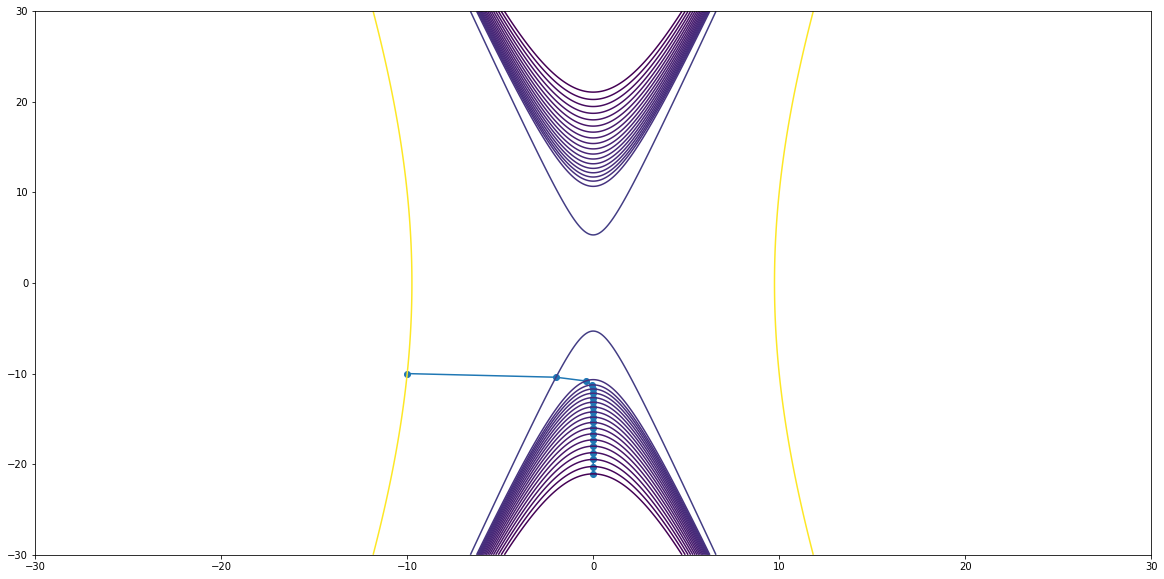

In [167]:
lr = 0.08
epoch = 20
x = [-10, -10]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

[[-10.         -10.        ]
 [  0.         -10.5       ]
 [  0.         -11.01977616]
 [  0.         -11.55985466]
 [  0.         -12.12076513]
 [  0.         -12.70304028]
 [  0.         -13.30721557]
 [  0.         -13.93382875]
 [  0.         -14.58341954]
 [  0.         -15.25652919]
 [  0.         -15.95370008]
 [  0.         -16.67547532]
 [  0.         -17.42239832]
 [  0.         -18.19501238]
 [  0.         -18.99386024]
 [  0.         -19.81948368]
 [  0.         -20.67242307]
 [  0.         -21.55321691]
 [  0.         -22.46240145]
 [  0.         -23.40051019]]


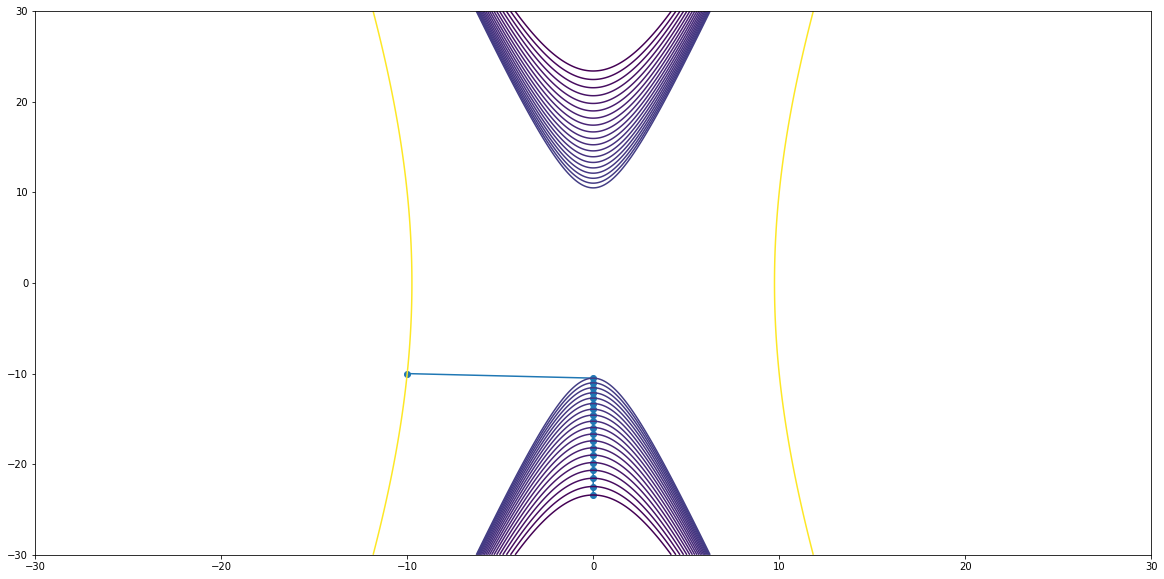

In [168]:
import optimization as opt

epoch = 20
x = [-10, -10]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))